In [27]:
import os
import json
import pandas as pd
import numpy as np
import PIL
import matplotlib.pyplot as plt
import cv2

In [28]:
BASE_DIR = '/kaggle/input/cassava-leaf-disease-classification'

In [29]:
with open('/kaggle/input/cassava-leaf-disease-classification/label_num_to_disease_map.json') as f:
    print('yes')
    

yes


In [30]:
# step 1
with open(os.path.join(BASE_DIR,'label_num_to_disease_map.json')) as f:
    map_classes=json.loads(f.read())
    map_classes={int(k): v for k,v in map_classes.items()}

print("Map classes: ", map_classes)

Map classes:  {0: 'Cassava Bacterial Blight (CBB)', 1: 'Cassava Brown Streak Disease (CBSD)', 2: 'Cassava Green Mottle (CGM)', 3: 'Cassava Mosaic Disease (CMD)', 4: 'Healthy'}


In [31]:
len(os.listdir(os.path.join(BASE_DIR, 'train_images')) )

21397

In [32]:
df_train = pd.read_csv(os.path.join(BASE_DIR,'train.csv'))

In [33]:
df_train.head()

image_id  label
0  1000015157.jpg      0
1  1000201771.jpg      3
2   100042118.jpg      1
3  1000723321.jpg      1
4  1000812911.jpg      3

In [34]:
# df_train['class_label'] = df_train['label'].map(map_classes)

In [35]:
df_train.head()

image_id  label
0  1000015157.jpg      0
1  1000201771.jpg      3
2   100042118.jpg      1
3  1000723321.jpg      1
4  1000812911.jpg      3

In [36]:
df_train['class_label'] = df_train['label'].apply(lambda x: map_classes[x])

In [37]:
df_train.head()

image_id  label                          class_label
0  1000015157.jpg      0       Cassava Bacterial Blight (CBB)
1  1000201771.jpg      3         Cassava Mosaic Disease (CMD)
2   100042118.jpg      1  Cassava Brown Streak Disease (CBSD)
3  1000723321.jpg      1  Cassava Brown Streak Disease (CBSD)
4  1000812911.jpg      3         Cassava Mosaic Disease (CMD)

In [38]:
df_train['class_label'].value_counts()

class_label
Cassava Mosaic Disease (CMD)           13158
Healthy                                 2577
Cassava Green Mottle (CGM)              2386
Cassava Brown Streak Disease (CBSD)     2189
Cassava Bacterial Blight (CBB)          1087
Name: count, dtype: int64

<Axes: xlabel='class_label'>

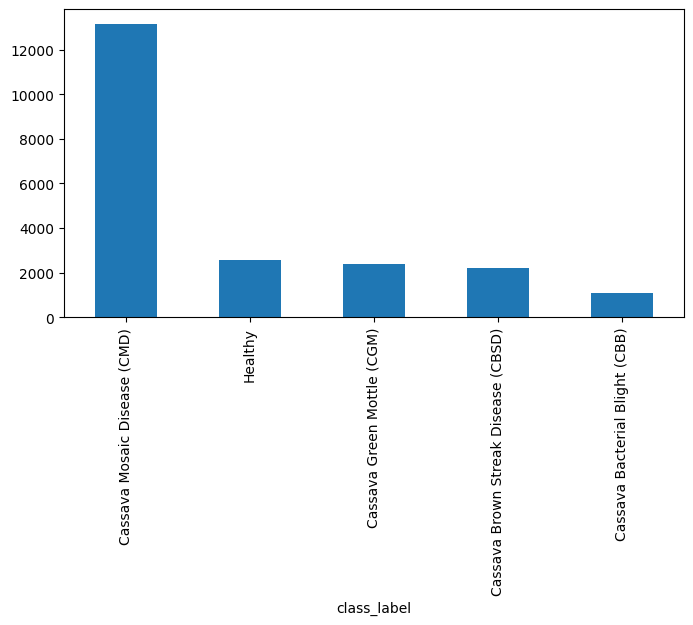

In [39]:
plt.figure(figsize=(8,4))
class_distribution = df_train['class_label'].value_counts()
class_distribution.plot(kind='bar')

<Axes: xlabel='count', ylabel='class_label'>

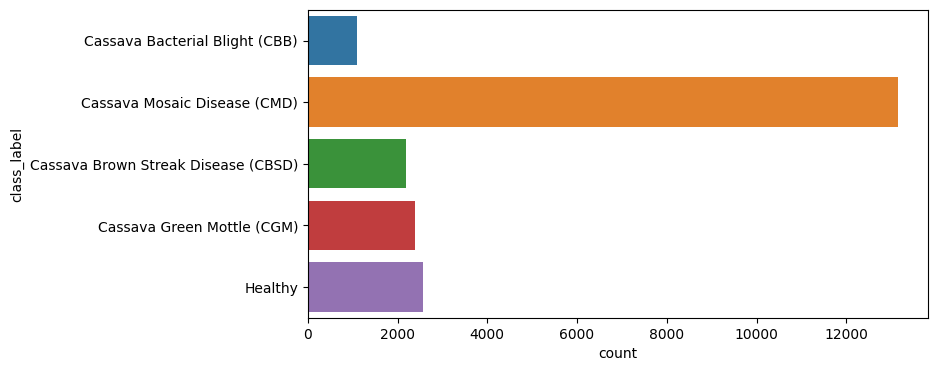

In [40]:
import seaborn as sns
plt.figure(figsize=(8,4))
sns.countplot(y='class_label',data=df_train)


In [41]:
df_train.isnull().sum()

image_id       0
label          0
class_label    0
dtype: int64

In [42]:
train_path = os.path.join(BASE_DIR,'train_images')


In [43]:
image_shapes = {}

for image in os.listdir(os.path.join(train_path))[:500]:
    image_path = os.path.join(train_path,image)
    image_shape=cv2.imread(image_path).shape
    image_shapes[image_shape]=image_shapes.get(image_shape,0)+1



In [44]:
print(image_shapes)

{(600, 800, 3): 500}


In [45]:
image_path = '/kaggle/input/cassava-leaf-disease-classification/train_images/1000015157.jpg'


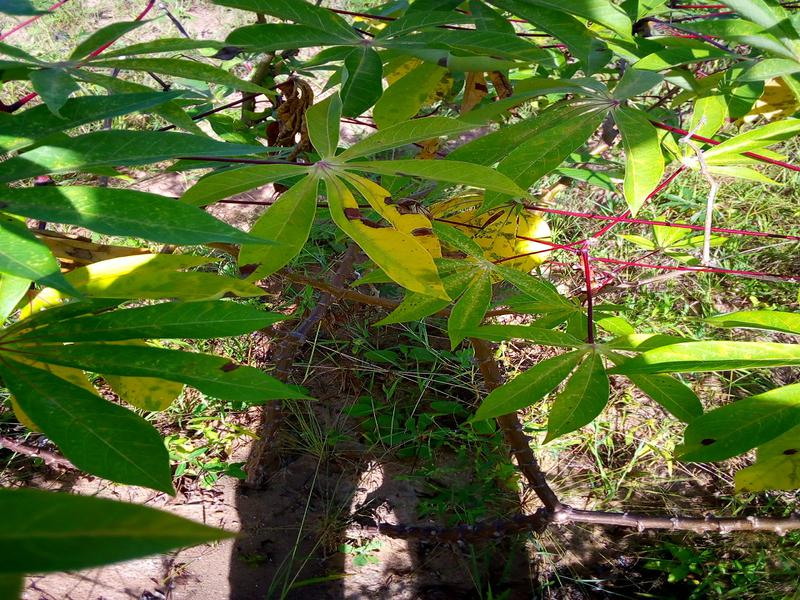

In [46]:
PIL.Image.open(image_path)

In [47]:
from IPython.display import display


In [48]:
import os, cv2, numpy as np
from PIL import Image
from IPython.display import display

def show_image(class_label, class_no=9):
    images_meta = []
    for image in os.listdir(train_path)[:class_no]:
        image_path = os.path.join(train_path, image)
        img = cv2.imread(image_path)
        # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (512, 512))
        images_meta.append(img)

    rows = []
    for i in range(0, class_no, 3):
        rows.append(np.hstack(images_meta[i:i+3]))
    collage_array = np.vstack(rows)

    collage = Image.fromarray(collage_array)
    collage.save('collage.png')
    display(collage)


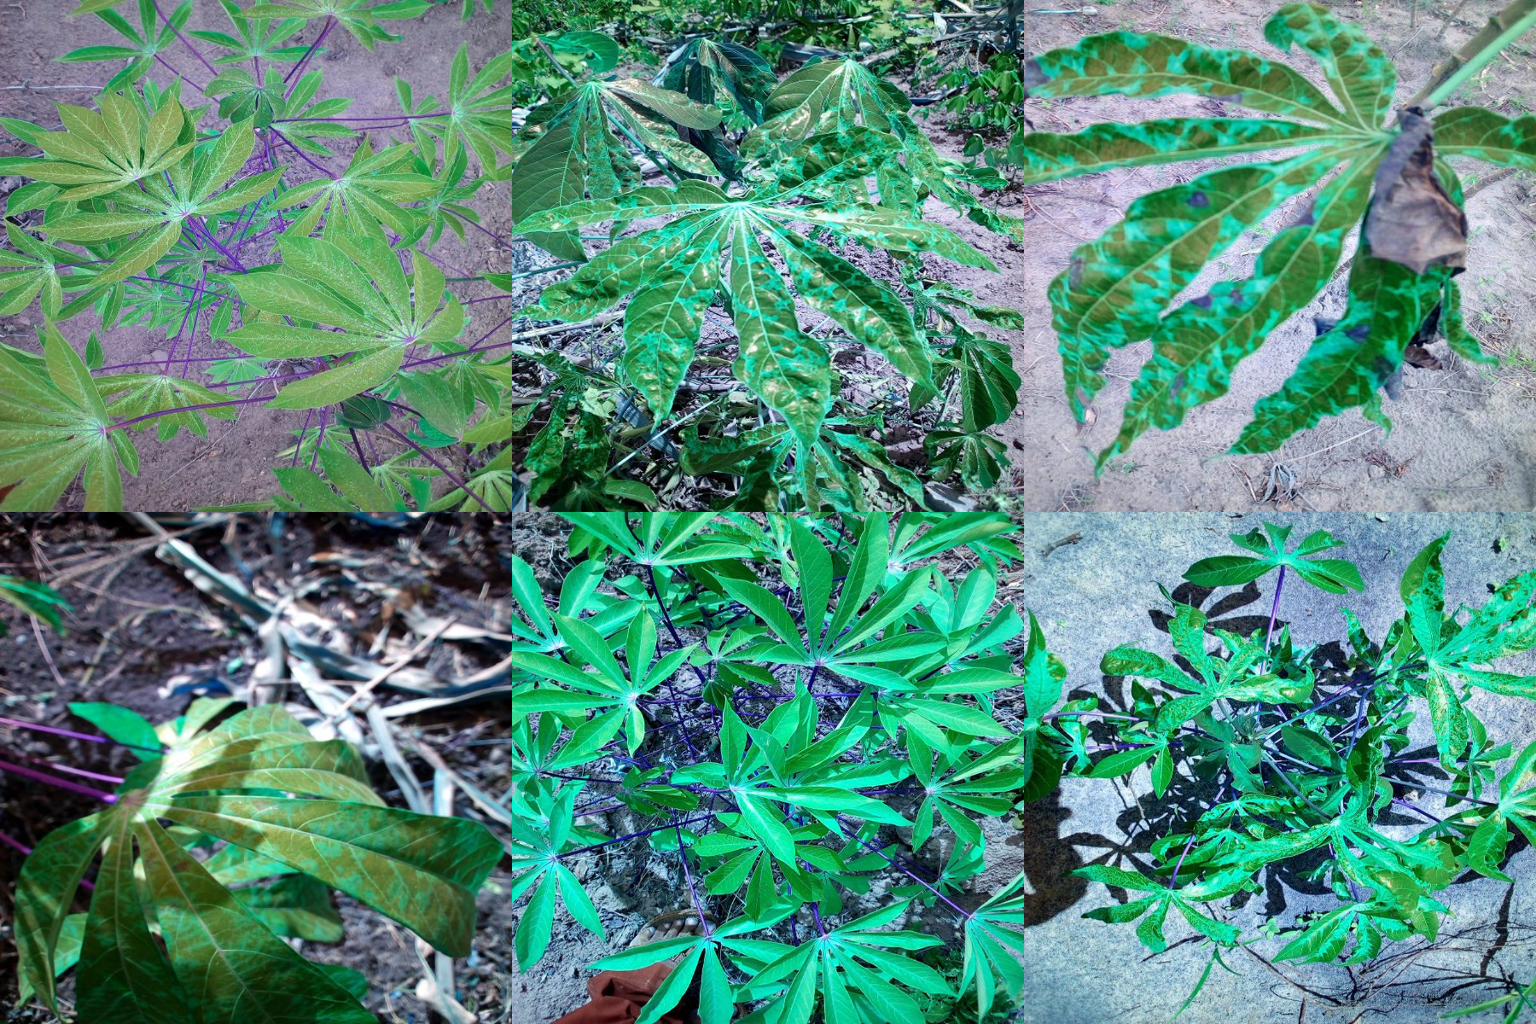

In [49]:
show_image('g',6)

In [50]:
input_shape = cv2.imread(f'{train_path}/{os.listdir(train_path)[0]}').shape

In [51]:
input_shape

(600, 800, 3)

In [52]:
import tensorflow as tf
from tensorflow import keras

model= keras.Sequential([
    keras.layers.Input(shape=(256, 256, 3)),

    keras.layers.Conv2D(64,(3,3)),
    keras.layers.Activation(keras.activations.relu),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(
        pool_size=(2, 2), strides=None, padding="valid",
    ),

    
    keras.layers.Conv2D(128,(3,3)),
    keras.layers.Activation(keras.activations.relu),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(
        pool_size=(2, 2), strides=None, padding="valid",
    ),
    

    keras.layers.Conv2D(256,(3,3)),
    keras.layers.Activation(keras.activations.relu),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(
        pool_size=(2, 2), strides=None, padding="valid", 
    ),

    keras.layers.Conv2D(512,(3,3)),
    keras.layers.Activation(keras.activations.relu),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(
        pool_size=(2, 2), strides=None, padding="valid", 
    ),

    
    # keras.layers.Conv2D(512,(3,3)),
    # keras.layers.Activation(keras.activations.relu),
    # keras.layers.BatchNormalization(),
    # keras.layers.MaxPooling2D(
    #     pool_size=(2, 2), strides=None, padding="valid", 
    # ),
    keras.layers.Flatten(),
    
    keras.layers.Dense(256,activation='relu'),
    keras.layers.Dense(512,activation='relu'),
    keras.layers.Dense(5,activation='softmax'),
    
    

])

I0000 00:00:1762101277.719195     753 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1762101277.719848     753 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


In [53]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)


In [54]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 254, 254, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 125, 125, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 60, 60, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 28, 28, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 28, 28, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    25,690,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │         2,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,379,333 (104.44 MB)

 Trainable params: 27,377,413 (104.44 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [55]:
train_path

'/kaggle/input/cassava-leaf-disease-classification/train_images'

In [56]:
def load_image(path, label):
    img = tf.io.read_file(path)                      # read the image file (bytes)
    img = tf.image.decode_jpeg(img, channels=3)      # convert bytes → tensor (H, W, 3)
    img = tf.image.resize(img, [256, 256])           # resize for model input
    return img, label                                # return image–label pair


In [57]:
df_train_split = df_train.iloc[:20000, :]
df_valid_split = df_train.iloc[20000:, :]
label_to_index = {name: i for i, name in map_classes.items()}

df_train_split['image_path'] = df_train_split['image_id'].apply(lambda x: os.path.join(train_path, x))
train_paths = df_train_split['image_path'].values
train_labels = df_train_split['class_label'].values
train_labels = [label_to_index[label] for label in train_labels]

train_dataset = tf.data.Dataset.from_tensor_slices((train_paths, train_labels))
train_dataset = train_dataset.map(load_image, num_parallel_calls=tf.data.AUTOTUNE)
train_dataset = train_dataset.batch(32).shuffle(1000).prefetch(tf.data.AUTOTUNE)

df_valid_split['image_path'] = df_valid_split['image_id'].apply(lambda x: os.path.join(train_path, x))
valid_paths = df_valid_split['image_path'].values
valid_labels = df_valid_split['class_label'].values
valid_labels = [label_to_index[label] for label in valid_labels]

valid_dataset = tf.data.Dataset.from_tensor_slices((valid_paths, valid_labels))
valid_dataset = valid_dataset.map(load_image, num_parallel_calls=tf.data.AUTOTUNE)
valid_dataset = valid_dataset.batch(32).prefetch(tf.data.AUTOTUNE)


/tmp/ipykernel_753/698023513.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_split['image_path'] = df_train_split['image_id'].apply(lambda x: os.path.join(train_path, x))
/tmp/ipykernel_753/698023513.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid_split['image_path'] = df_valid_split['image_id'].apply(lambda x: os.path.join(train_path, x))


In [58]:
map_classes

{0: 'Cassava Bacterial Blight (CBB)',
 1: 'Cassava Brown Streak Disease (CBSD)',
 2: 'Cassava Green Mottle (CGM)',
 3: 'Cassava Mosaic Disease (CMD)',
 4: 'Healthy'}

In [59]:
callback = [keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.01,
    patience=5,
    min_delta=0.0001,
    cooldown=0,
    min_lr=0.0,
    
)]

In [ ]:
model.fit(
    train_dataset,
    epochs=30,
    validation_data=valid_dataset 
)


Epoch 1/30


I0000 00:00:1762101335.881115     812 service.cc:148] XLA service 0x79efac01f710 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1762101335.881762     812 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1762101335.881783     812 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1762101336.371073     812 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1762101352.878349     812 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


309/625 ━━━━━━━━━━━━━━━━━━━━ 55s 176ms/step - accuracy: 0.4817 - loss: 5.7995

In [ ]:
# for img, label in train_dataset.take(1):
#     print(img.shape, label)
